In [1]:
import numpy as np

f = dict()
f[(-2, 0)] = 2
f[(-2, 1)] = 2
f[(1, 0)] = 1
f[(1, 1)] = 1

T = 10000
eps = 0.1
data = dict()
# data for each arm
data[0] = [0, 0]
data[1] = [0, 0]

theta0 = 0
theta1 = 0

res = []

for t in range(10000):
    Xt = [-1, 0][np.random.randint(0, 2)]
    if Xt == -1:
        Xt_tilde = np.random.choice([-2, 1], p=[2/3, 1/3])
    else:
        Xt_tilde = np.random.choice([-2, 1], p=[1/3, 2/3])
    Y1 = theta0 * Xt_tilde
    Y2 = theta1 * Xt_tilde
    idx = np.argmax([Y1, Y2])
    if idx == 0:
        At = np.random.choice([0, 1], p=[1-eps, eps])
    else:
        At = np.random.choice([0, 1], p=[eps, 1-eps])
    Yt = -3*Xt
    data[At][0] += Xt_tilde**2
    data[At][1] += Yt * Xt_tilde
    theta0 = data[0][1] / (data[0][0] + 0.0001)
    theta1 = data[1][1] / (data[1][0] + 0.0001)
    res.append((theta0, theta1))


In [19]:
import numpy as np

f = dict()
f[(-2, 0)] = 2
f[(-2, 1)] = 2
f[(1, 0)] = 1
f[(1, 1)] = 1

T = 10000
data = dict()
# data for each arm
data[0] = [0, 0, 0]  # [sum of X, sum of Y, number of pulls]
data[1] = [0, 0, 0]
eps = 0.01

theta0 = 0
theta1 = 0

res = []

for t in range(1, T+1):
    Xt = [-1, 0][np.random.randint(0, 2)]
    if Xt == -1:
        Xt_tilde = np.random.choice([-2, 1], p=[2/3, 1/3])
    else:
        Xt_tilde = np.random.choice([-2, 1], p=[1/3, 2/3])
    
    # Calculate UCB for each arm
    ucb0 = (data[0][1] / (data[0][2] + 0.0001)) + np.sqrt(2 * np.log(t) / (data[0][2] + 0.0001))
    ucb1 = (data[1][1] / (data[1][2] + 0.0001)) + np.sqrt(2 * np.log(t) / (data[1][2] + 0.0001))
    
    # Choose arm with highest UCB
    idx = 0 if ucb0 > ucb1 else 1
    if idx == 0:
        At = np.random.choice([0, 1], p=[1-eps, eps])
    else:
        At = np.random.choice([0, 1], p=[eps, 1-eps])
    
    Yt = -3*Xt
    data[At][0] += Xt_tilde**2
    data[At][1] += Yt * Xt_tilde
    data[At][2] += 1
    
    theta0 = data[0][1] / (data[0][0] + 0.0001)
    theta1 = data[1][1] / (data[1][0] + 0.0001)
    res.append((theta0, theta1))


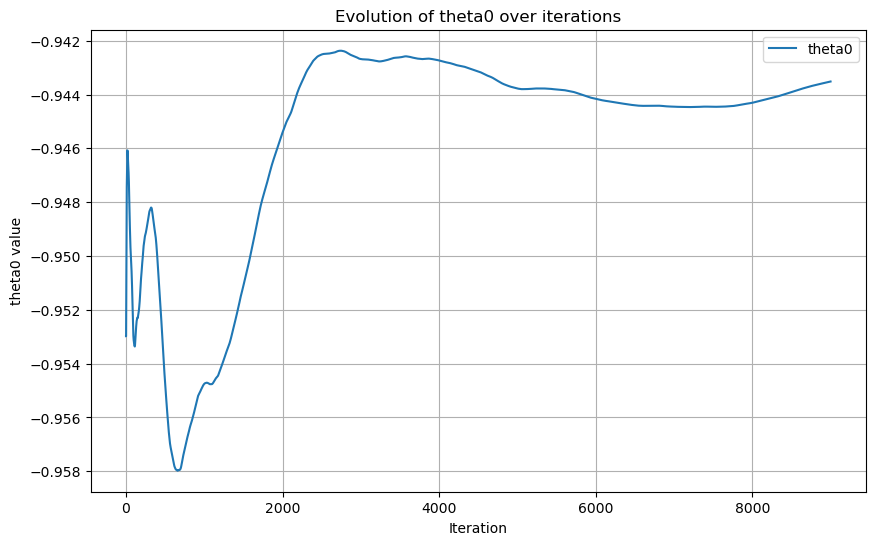

In [2]:
import matplotlib.pyplot as plt

# Extract theta0 values from the res list
theta0_values = [pair[0] for pair in res][1000:]

# Create a line plot for theta0
plt.figure(figsize=(10, 6))
plt.plot(range(len(theta0_values)), np.cumsum(theta0_values) / np.arange(1, len(theta0_values)+1), label='theta0')
plt.xlabel('Iteration')
plt.ylabel('theta0 value')
plt.title('Evolution of theta0 over iterations')
plt.legend()
plt.grid(True)
plt.show()
